<a href="https://colab.research.google.com/github/cristobalroldan/TareaGIO/blob/main/TareaGIO_n2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
import numpy as np 
import math

m = 100
n = 2
a = np.random.uniform(-10,10, size=(m,n))
np.around(a,2,a)
b = np.random.uniform(-10,10, m)
np.around(b,2,b)

array([-7.05,  4.26,  1.53,  5.27,  5.86,  1.19,  9.16,  6.95,  2.41,
       -8.1 ,  9.12,  4.95,  6.38, -1.32, -5.32, -9.73, -8.29, -2.5 ,
       -3.  ,  1.95,  7.84, -5.41,  4.31, -3.18, -5.41, -6.85, -3.97,
       -6.01,  6.85, -4.98, -4.51, -5.16,  8.63,  9.34, -3.09, -3.61,
        4.4 , -2.7 ,  4.36,  9.58, -7.82, -1.28,  4.55, -6.62,  0.94,
       -7.54, -8.83,  6.  ,  5.51, -7.73,  9.67,  8.41,  7.31, -6.05,
        8.9 , -7.68, -6.63,  7.23,  0.93, -6.58, -0.34,  0.69,  8.14,
       -6.08, -1.  ,  0.92, -9.7 ,  5.97,  7.04, -6.18, -7.17,  2.03,
       -6.94,  9.04, -0.71,  6.52,  9.73,  7.37, -5.96,  5.06, -8.53,
       -9.73, -3.22,  7.11, -7.48, -6.78,  6.59,  9.22, -8.96, -8.6 ,
       -7.98, -2.17,  6.58,  6.16, -7.14, -1.11,  9.36, -9.83, -0.92,
       -9.16])

In [213]:
#x = np.random.randint(1,20, n)
x=[1,1] # x fijo
print(x)

[1, 1]


In [214]:
def f(x): 
    i = 1
    totalsum = np.float128(0.0)
    totalexp = np.float128(0.0)
    aux = np.float128(0.0)
    aux2 = np.float128(0.0)
    while i <= m:
        totalexp = 0
        j = 1
        while j <= n:
            aux = np.float128(((a[i-1][j-1])*x[j-1]) + b[i-1])
            totalexp = np.float128(totalexp) + np.float128(aux)
            j = j + 1
        aux2 = np.float128(np.exp(np.float128(totalexp)))
        #print(aux)
        totalsum = np.float128(totalsum + aux2)
        #print(totalsum)
        i = i + 1
    return np.log(np.float64(totalsum)) # retorna float 64 bits
f(x)


28.296464141488237

In [215]:
def fsinLog(x): 
    i = 1
    totalsum = np.float128(0.0)
    totalexp = np.float128(0.0)
    aux = np.float128(0.0)
    aux2 = np.float128(0.0)
    while i <= m:
        totalexp = 0
        j = 1
        while j <= n:
            aux = np.float128(((a[i-1][j-1])*x[j-1]) + b[i-1])
            totalexp = np.float128(totalexp + aux)
            j = j + 1
        aux2 = np.exp(np.float128(totalexp))
        #print(aux)
        totalsum = np.float128(totalsum + aux2)
        #print(totalsum)
        i = i + 1
    return np.float128(totalsum)
fsinLog(x)

1945352171190.71313

In [216]:
def fdx(x):
    # print(x)
    i = 1
    totalsum = np.float128(0.0)
    totalexp = np.float128(0.0)
    aux = np.float128(0.0)
    aux2 = np.float128(0.0)
    while i <= m:
        totalexp = 0
        j =1
        while(j <= n):
          aux = np.float128(a[i-1][j-1]*x[j-1] + b[i-1])
          totalexp = np.float128(totalexp) + np.float128(aux)
          j = j+1
        aux2 = np.float128(np.exp(np.float128(totalexp))*a.item(i-1,0))
        #print(aux2)
        totalsum = np.float128(totalsum) + np.float128(aux2)
        # print(totalsum)
        i = i + 1
    
    i = 1
    totalsum2 = np.float128(0.0)
    totalexp = np.float128(0.0)
    aux = np.float128(0.0)
    aux2 = np.float128(0.0)
    while i <= m:
        totalexp = 0
        j =1
        while(j <= n):
          aux = np.float128(a[i-1][j-1]*x[j-1] + b[i-1])
          totalexp = np.float128(totalexp) + np.float128(aux)
          j = j +1
        aux2 = np.float128(np.exp(np.float128(totalexp))*a.item(i-1,1))
        #print(aux2)

        totalsum2 = np.float128(totalsum2) + np.float128(aux2)
        # print(totalsum)
        i = i + 1

    return np.array([(1/fsinLog(x))*totalsum, (1/fsinLog(x))*totalsum2], dtype=np.float64) #retorna float64

print(fdx(x))

[7.41110858 4.58599999]


In [217]:
def backtrack4(x0, f, fdx, t = 1, alpha = 0.2, beta = 0.3):
    
    point = x0 #Necessary to ensure matrix form
    #print(point)
    it=0
    #while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * np.asscalar(np.dot(np.transpose(fdx(point)), -1*fdx(point))):
    while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * (np.dot(np.transpose(fdx(point)), -1*fdx(point))):
         t *= beta
         #print(f(point - np.dot(t,fdx(point))),f(point) + alpha * t * (np.dot(np.transpose(fdx(point)), -1*fdx(point))),it)
         it=it+1
    return t

backtrack4([0.1,0.1], f, fdx)

0.027

In [218]:
# def backtrack5(x0, f, deltax, t = 1, alpha = 0.4, beta = 0.9):
    
#     point = x0 #Necessary to ensure matrix form
#     #print(point)
#     #while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * np.asscalar(np.dot(np.transpose(fdx(point)), -1*fdx(point))):
#     while f(point - np.dot(t,deltax)) > f(point) + alpha * t * (np.dot(np.transpose(deltax), -1*deltax)):
#          t = t*beta
#         #  print(t)
#     return t

# backtrack5(x, f,fdx)

In [219]:
#@title
def grad(x0, max_iter):
    iter = 1
    
    while (np.linalg.norm(np.array(fdx(x0))) > 0.0001):
    #Find stepsize by backtracking
        t = backtrack4(x0, f, fdx) #Step Size
        x0 = x0 - np.dot(t, np.transpose(fdx(x0)))
        #Calculate New Value of Function
        print(x0, f(x0), fdx(x0),t, iter)
        iter += 1
        if iter > max_iter:
            break
    return x0, f(x0), iter

grad(x, 100)

[0.33300023 0.58726   ] 22.932171942241094 [5.04025787 2.05144454] 0.09 1
[-0.12062298  0.40262999] 21.98820189164478 [-5.31475999  2.59795329] 0.09 2
[0.02287554 0.33248525] 21.428891747992115 [-0.01626294  1.86291877] 0.027 3
[0.0243392  0.16482256] 21.177448350044205 [0.68579496 1.02512261] 0.09 4
[-0.03738234  0.07256153] 21.115997442120136 [-0.92874233  0.41197533] 0.09 5
[-0.0123063  0.0614382] 21.100775144620844 [-0.0499607   0.14487172] 0.027 6
[-0.01095736  0.05752666] 21.100293180001128 [0.00999082 0.08769329] 0.027 7
[-0.01185653  0.04963426] 21.099990326003564 [ 0.0160875  -0.01458643] 0.09 8
[-0.0122909  0.0500281] 21.09998234472721 [ 0.00080025 -0.00731299] 0.027 9
[-0.01236292  0.05068627] 21.099980722128613 [-0.00431484  0.00199367] 0.09 10
[-0.01224642  0.05063244] 21.099980371746508 [-0.00043167  0.00075259] 0.027 11
[-0.01223476  0.05061212] 21.099980357396237 [2.16086128e-05 4.24637658e-04] 0.027 12
[-0.01223671  0.0505739 ] 21.099980350829355 [ 1.26740825e-04 -8.85

(array([-0.01224013,  0.05057629]), 21.09998035044186, 15)

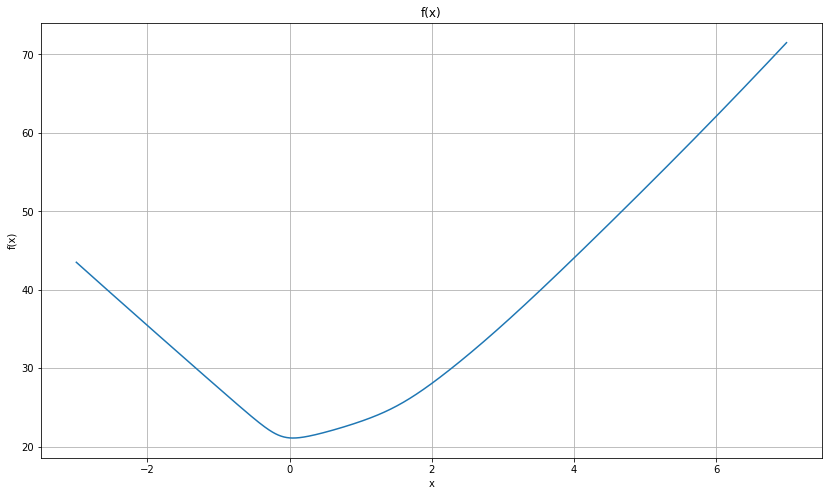

por evaluaciónes: 21.100794329056864
por optimización: 21.118468166717513


In [220]:
import matplotlib.pyplot as plt

x00= np.arange(-3, 7, 0.01)
#print(x0)
y=[]
for i in x00:
    y.append(f([-0.019501,i]))
    #print(f([0.1,i]))

plt.figure(figsize=(14,8))
plt.plot(x00,y,'')
plt.ylabel('f(x)')
plt.xlabel('x')
#plt.axis([0, 2450, 0, 45])
plt.grid(True)
plt.title('f(x)')
# [xmin, xmax, ymin, ymax] 
plt.show()
print("por evaluaciónes: "+str(min(y)))
print("por optimización: "+str(f([-0.019501 , -0.0005068])))

In [221]:
def Hessian(x0,fdx): #punto y derivada
  dt=0.000001
  dxdx=( fdx( [x0[0]+dt, x0[1]] )[0] - fdx(x0)[0] ) / dt
  dxdy=( fdx( [ x0[0]+dt , x0[1] ] )[1] - fdx(x0)[1] ) / dt
  dydx=( fdx( [ x0[0] , x0[1]+dt ] )[0] - fdx(x0)[0] ) / dt
  dydy=( fdx( [ x0[0] , x0[1]+dt ] )[1] - fdx(x0)[1] ) / dt
  return[[dxdx,dxdy],[dydx,dydy]]

In [225]:
def backtrack5(x0, f, fdx, t = 1, alpha = 0.2, beta = 0.3):
    
    point = x0 #Necessary to ensure matrix form
    #print(point)
    #while f(point - np.dot(t,fdx(point))) > f(point) + alpha * t * np.asscalar(np.dot(np.transpose(fdx(point)), -1*fdx(point))):
    while f(point - np.dot(t,-fdx)) > f(point) + alpha * t * (np.dot(np.transpose(-fdx), 1*fdx)):
      t *= beta
      #print(f(point - np.dot(t,fdx)))
    return t

In [223]:
import numpy.linalg as npla
def lambda_sq(fdx, Hessian, point):
    lambda_sq1 = np.dot(fdx(point).T, np.dot(npla.pinv( Hessian(point,fdx) ) , fdx(point)  )) 
    return lambda_sq1.item() 
     
def delta_x(fdx, Hessian, point):
    delta_x =- np.dot(npla.pinv(Hessian(point,fdx)) , fdx(point))
    return np.array(delta_x)


In [227]:

import numpy.linalg as npla
##################################################
x=[1,1]  #Método de newton siempre parte de [1,1]
######################################################

def lambda_sq(fdx, Hessian, point):
    lambda_sq1 = np.dot(fdx(point).T, np.dot(npla.pinv( Hessian(point,fdx) ) , fdx(point)  )) 
    return lambda_sq1.item() 
     
def delta_x(fdx, Hessian, point):
    delta_x =- np.dot(npla.pinv(Hessian(point,fdx)) , fdx(point))
    return np.array(delta_x)

#eps is the tolerance condition to exit out of the while loop
def newtons_method(x, eps=0.0001, max_iters=20):
    iters = 1
    lmb_sq = lambda_sq(fdx, Hessian, x)
    #In while loop we are checking the magnitude of Newton's decrement. If it's below tolerance we exit out.
    #t=0.0001
    print(x, f(x), fdx(x), 0, iters)
    while(( ((lmb_sq))**2/2.0) > eps):
        dlt_x = delta_x(fdx, Hessian, x) # paso
        lmb_sq = lambda_sq(fdx, Hessian, x)  #decremento

        t =backtrack5(x, f, dlt_x)  # t óptimo
        x = np.array((x + np.dot(t , dlt_x))) # nuevo x

        print(x, f(x), fdx(x), t, iters)
        iters = 1 + iters  
        if(iters > max_iters):
            break
    return x, f(x), iters
#Test
newtons_method(x)

[1, 1] 28.296464141488237 [7.41110858 4.58599999] 0 1
[0.37618249 1.26998434] 25.132918435835457 [6.08055937 4.09444409] 0.09 1
[-0.28230532  0.69443835] 23.943327491654824 [-7.80654703  2.99892481] 1 2
[-0.16725946 -0.16518466] 21.71603753721632 [-3.14486079 -3.58226689] 0.09 3
[0.03690173 0.03169495] 21.1413814323829 [ 1.46080796 -0.42004947] 1 4
[-0.0188771   0.05322795] 21.100800651551662 [-0.22183827  0.06586538] 1 5
[-0.01231006  0.05061916] 21.099980450175057 [-0.00236707  0.00084803] 1 6


(array([-0.01231006,  0.05061916]), 21.099980450175057, 7)